# Analyzing NY Times Articles

<img src="images/new-york-times-logo.jpg" width=600>

## General Data Science Outline

<img src="images/ds_cycle.png" width=750>

## Our Outline
<img src="images/News_Analysis_Outline.jpg">

# Acquire Articles - The NY Times API

https://developers.nytimes.com/

<img src="images/nytimes_api.png" width=1050>



### Reading Documentation

https://developer.nytimes.com/article_search_v2.json

<img src="images/nyt_docs.png" width=1000>

<img src="images/nyt_ex.png" width=1000>

#### HTTP Requests <a id="http"></a>
HTTP stands for Hyper Text Transfer Protocol. This protocol (like many) was proposed by the Internet Engineering Task Force (IETF) through a request for comments (RFC). We're going to start with a very simple HTTP method: the get method.  

![](./images/http_requests.png)

To learn more about HTTP methods see:  
https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods

#### Python's Requests Package <a id="req"></a>
The first thing to understand when dealing with APIs is how to make get requests in general.
To do this, we'll use the Python requests package.

http://docs.python-requests.org/en/master/

![](./images/requests_homepage.png)

### Making a  get request <a id="get_request"></a>

In [1]:
import requests

In [9]:
response = requests.get('https://flatironschool.com')
print('Type:', type(response), '\n')
print('Response:', response, '\n')
print('Response text:\n', response.text)

Type: <class 'requests.models.Response'> 

Response: <Response [403]> 

Response text:
 <html>
<head><title>403 Forbidden</title></head>
<body bgcolor="white">
<center><h1>403 Forbidden</h1></center>
<hr><center>nginx</center>
</body>
</html>



Hmmm, well that was only partially helpful. You can see that our request was denied. (This is shown by the response itself, which has the code 403, meaning forbidden.) Most likely, this is caused by permissioning from Flatiron School's servers, which may be blocking requests that appear to be from an automated platform.

### HTTP Response Codes <a id="http_codes"></a>
In general, here's some common HTTP response codes you might come across:
![](./images/http_response_codes.gif)

Let's try another get request in the hopes of getting a successful (200) response.

In [11]:
#The Electronic Frontier Foundation (EFF) website; advocating for data privacy and an open internet
response = requests.get('https://www.eff.org')
print(response)
print(response.text[:2500])

<Response [200]>
<!DOCTYPE html>
  <!--[if IEMobile 7]><html class="no-js ie iem7" lang="en" dir="ltr"><![endif]-->
  <!--[if lte IE 6]><html class="no-js ie lt-ie9 lt-ie8 lt-ie7" lang="en" dir="ltr"><![endif]-->
  <!--[if (IE 7)&(!IEMobile)]><html class="no-js ie lt-ie9 lt-ie8" lang="en" dir="ltr"><![endif]-->
  <!--[if IE 8]><html class="no-js ie lt-ie9" lang="en" dir="ltr"><![endif]-->
  <!--[if (gte IE 9)|(gt IEMobile 7)]><html class="no-js ie" lang="en" dir="ltr" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#"><![endif]-->
  <!--[if !IE]><!--><html class="no-js" lang="en" dir="ltr" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#"><!--<![endif

Success! As you can see, the response.text is the html code for the given url that we requested. In the background, this forms the basis for web browsers themselves. Every time you put in a new url or click on a link your computer makes a get request for that particular page and then the browser itself renders that page into a visual display on screen.

### OAuth  <a id="oauth"></a>
Some requests are a bit more complicated. Often, websites require identity verification such as logins. This helps a variety of issues such as privacy concerns, limiting access to content and tracking users history. Going forward, OAuth has furthered this idea by allowing third parties such as apps access to user information without providing the underlying password itself.

In the words of the Internet Engineering Task Force, "The OAuth 2.0 authorization framework enables a third-party
application to obtain limited access to an HTTP service, either on
behalf of a resource owner by orchestrating an approval interaction
between the resource owner and the HTTP service, or by allowing the
third-party application to obtain access on its own behalf.  This
specification replaces and obsoletes the OAuth 1.0 protocol described
in RFC 5849."

See https://oauth.net/2/ or https://tools.ietf.org/html/rfc6749 for more details.

## Access Tokens

In order to make requests to many APIs, you are required to *login* via an access token. As a result, the first step is to sign up through the web interface using your browser. Once you have an API key, you can then use it to make requests to the API. As with login passwords for your computer, these access tokens should be kept secret! For example, rather then including the passwords directly in this file, I have saved them to a seperate file called **'ny_times_api_keys.py'**. The file would look something like this:

```api_key = 'blah_blah_blah_YOUR_KEY_HERE'```

Now it's time to start making some api calls!

In [12]:
from ny_times_api_keys import *

In [8]:
import requests

In [70]:
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
url_params = {"api-key" : api_key,
             'fq' : 'The New York Times',
             'sort' : "newest"}
response = requests.get(url, params=url_params)


In [71]:
response

<Response [200]>

# JSON Files

While you can see that we received an HTTP code of 200, indicating success, the actual data from the request is stored in a json file format. JSON stands for **Javascript Object Notation** and is the standard format for most data requests from the web these days. You can read more about json [here](https://www.json.org/). With that, let's take a quick look at our data:

In [72]:
response.json()

{'status': 'OK',
 'copyright': 'Copyright (c) 2018 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'web_url': 'https://www.nytimes.com/interactive/2018/upshot/elections-poll-ny22.html',
    'snippet': 'The district stretches from Lake Ontario to the Pennsylvania border.',
    'blog': {},
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,
      'credit': None,
      'type': 'image',
      'url': 'images/2018/11/01/upshot/elections-poll-ny22-1541083888183/elections-poll-ny22-1541083888183-articleLarge.png',
      'height': 368,
      'width': 600,
      'legacy': {'xlarge': 'images/2018/11/01/upshot/elections-poll-ny22-1541083888183/elections-poll-ny22-1541083888183-articleLarge.png',
       'xlargewidth': 600,
       'xlargeheight': 368},
      'subType': 'xlarge',
      'crop_name': 'articleLarge'},
     {'rank': 0,
      'subtype': 'wide',
      'caption': None,
      'credit': None,
      'ty

In [16]:
type(response.json())

dict

In [29]:
response.json()['response']['docs'][0]['web_url']

'https://www.nytimes.com/1989/10/21/world/poland-s-premier-in-rome-seeks-aid.html'

In [24]:
response.json()['response']['docs'][0]['headline']

{'main': "POLAND'S PREMIER, IN ROME, SEEKS AID",
 'kicker': None,
 'content_kicker': None,
 'print_headline': None,
 'name': None,
 'seo': None,
 'sub': None}

## Transforming Our Data

In [35]:
import pandas as pd

In [37]:
pd.DataFrame(response.json()['response']['docs'])

,_id,abstract,blog,byline,document_type,headline,keywords,multimedia,news_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,web_url,word_count
0,4fd1aa418eb7c8105d6c7bc7,NaN,{},"{'original': 'By ALAN RIDING, Special to The N...",article,"{'main': 'POLAND'S PREMIER, IN ROME, SEEKS AID...","[{'name': 'persons', 'value': 'POPE', 'rank': ...",[],Foreign Desk,4,1989-10-21T00:00:00Z,1.0,NaN,LEAD: On his first trip abroad since taking of...,The New York Times,News,https://www.nytimes.com/1989/10/21/world/polan...,694
1,4fc04afd45c1498b0d22d8e2,Cable opened,{},NaN,article,{'main': 'PRESIDENT OPENS NEW MANILA CABLE; Me...,"[{'name': 'persons', 'value': 'ROOSEVELT, THEO...",[],NaN,1,1903-07-05T00:00:00Z,1.0,NaN,With the completion of the Commercial Pacific ...,The New York Times,Front Page,https://query.nytimes.com/gst/abstract.html?re...,1140
2,50193d971c22dfde670b384a,The N.H.L. gave the players' union thousands o...,{},"{'original': 'By JEFF Z. KLEIN', 'person': [{'...",blogpost,"{'main': 'In N.H.L. Negotiation, 76,000 Pages,...","[{'name': 'persons', 'value': 'Bettman, Gary',...",[],NaN,NaN,2012-08-01T10:24:31Z,1.0,Hockey,The N.H.L. gave the players' union thousands o...,The New York Times,Blog,https://slapshot.blogs.nytimes.com/2012/08/01/...,306
3,4fc0b42c45c1498b0d417411,"Leaves for Portsmouth, Me",{},NaN,article,"{'main': 'Birth Notice 1 -- No Title', 'kicker...","[{'name': 'persons', 'value': 'MEADOWCROFT, WM...",[],NaN,19,1931-07-18T00:00:00Z,1.0,NaN,"Leaves for Portsmouth, Me",The New York Times,Birth Notice,https://query.nytimes.com/gst/abstract.html?re...,139
4,5360131038f0d87ca6edfc10,"chrysanthemum show, NY Botanical Garden; illus",{},NaN,article,"{'main': 'MUMS DISPLAYED IN MOTIF OF JAPAN', '...","[{'name': 'subject', 'value': 'HORTICULTURE', ...",[],NaN,NaN,1964-11-09T00:00:00Z,1.0,NaN,"chrysanthemum show, NY Botanical Garden; illus",The New York Times,News,https://www.nytimes.com/1964/11/09/mums-displa...,198
5,4fc04afd45c1498b0d22d8e7,"Warner, J. De W., protest water fee tales",{},"{'original': 'JOHN DE WITT WARNER', 'person': ...",article,{'main': 'John De Witt Warner's Compensation.'...,"[{'name': 'persons', 'value': 'WARNER, J. DE W...",[],NaN,16,1903-12-15T00:00:00Z,1.0,NaN,"Warner, J. De W., protest water fee tales",The New York Times,Letter,https://query.nytimes.com/gst/abstract.html?re...,212
6,4fbfdf8145c1498b0d03fa63,NaN,{},NaN,article,"{'main': 'Amusements this Evening.', 'kicker':...",[],[],NaN,4,1863-09-23T00:03:58Z,1.0,NaN,,The New York Times,Article,https://www.nytimes.com/1863/09/23/news/amusem...,74
7,501945961c22dfde670b3882,A new study shows less mislabeling of sturgeon...,{},"{'original': 'By FLORENCE FABRICANT', 'person'...",blogpost,"{'main': 'A Caviar Crackdown Has Worked, Resea...","[{'name': 'glocations', 'value': 'New York Cit...",[],NaN,NaN,2012-08-01T11:02:20Z,1.0,Dining &amp; Wine,A new study shows less mislabeling of sturgeon...,The New York Times,Blog,https://dinersjournal.blogs.nytimes.com/2012/0...,412
8,4fc0b42c45c1498b0d417415,Wilson E; kidnapping feared,{},NaN,article,{'main': 'ACTRESS VANISHES; KIDNAPPING FEARED;...,"[{'name': 'persons', 'value': 'WILSON, EVELYN'...",[],NaN,15,1931-07-06T00:00:00Z,1.0,NaN,With a black silk purse as their most tangible...,The New York Times,Article,https://query.nytimes.com/gst/abstract.html?re...,713
9,4fc4782845c1498b0d9f334b,State Farm Mutual Auto Ins Co announces it wil...,{},NaN,article,"{'main': 'STATE FARM PLANS DIVIDEND PAYMENTS',...","[{'name': 'subject', 'value': 'AUTOMOBILE INSU...",[],NaN,52,1971-08-17T00:00:00Z,1.0,NaN,The State Farm Mutual Automobile Insurance Com...,The New York Times,Article,https://query.nytimes.com/gst/abstract.html?re...,171


## Repeating the process progromatically

In [39]:
import time

In [ ]:
responses = []
for i in range(10**3):
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    url_params = {"api-key" : api_key,
                 'fq' : 'The New York Times',
                  'q' : 'politics',
                  'sort' : "newest",
                 'page': i}
    response = requests.get(url, params=url_params)
    if response.status_code == 200:
        responses.append(response)
    else:
        print('Request Failed.')
        print(response)
        print('Pausing for 60 seconds.')
        time.sleep(60)
    time.sleep(2) #Always include a 2 second pause
print(len(responses))

## Pulling Out Headline Text

In [77]:
dfs = []
for r in responses:
    dfs.append(pd.DataFrame(r.json()['response']['docs']))
df = pd.concat(dfs, ignore_index=True)
print(len(df))
df.head()

2010


,_id,abstract,blog,byline,document_type,headline,keywords,multimedia,news_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,uri,web_url,word_count
0,5bdb3ba600a1bc2872e91b3c,NaN,{},"{'original': 'By MICHAEL TACKETT', 'person': [...",article,{'main': 'Writing Postcards Brings Voters Back...,"[{'name': 'subject', 'value': 'Politics and Go...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,NaN,2018-11-01T17:45:04+0000,16.240780,Politics,"A grass roots army of almost 40,000 is hand wr...",The New York Times,News,nyt://article/5de9ee53-d584-5ef8-bbb4-7ee60a67...,https://www.nytimes.com/2018/11/01/us/politics...,1001
1,5bdb39f600a1bc2872e91b39,NaN,{},"{'original': 'By MICHAEL S. SCHMIDT, MARK MAZZ...",article,{'main': 'Read the Emails: The Trump Campaign ...,"[{'name': 'subject', 'value': 'Presidential El...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,NaN,2018-11-01T17:37:56+0000,15.122690,Politics,Newly revealed messages show how the political...,The New York Times,News,nyt://article/02569d9a-d5b6-5e19-89c6-d74fc500...,https://www.nytimes.com/2018/11/01/us/politics...,964
2,5bdb39b100a1bc2872e91b38,NaN,{},"{'original': 'By SHARON LaFRANIERE, MICHAEL S....",article,{'main': 'Roger Stone Sold Himself to Trump’s ...,"[{'name': 'subject', 'value': 'Presidential El...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,NaN,2018-11-01T17:36:36+0000,13.804007,Politics,The special counsel is investigating whether M...,The New York Times,News,nyt://article/4ee43518-63b8-5f83-9077-c59eed29...,https://www.nytimes.com/2018/11/01/us/politics...,1762
3,5bdb391e00a1bc2872e91b32,NaN,{},"{'original': 'By JASON FARAGO', 'person': [{'f...",article,"{'main': 'How Conspiracy Theories Shape Art', ...","[{'name': 'subject', 'value': 'Art', 'rank': 1...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Weekend,NaN,2018-11-01T17:34:14+0000,9.288733,Art & Design,"At the Met Breuer, the crackpot exhibition “Ev...",The New York Times,Review,nyt://article/1deb977a-def7-5508-999d-9394c566...,https://www.nytimes.com/2018/11/01/arts/design...,1436
4,5bdb391f00a1bc2872e91b33,NaN,{},"{'original': 'By ALAN RAPPEPORT', 'person': [{...",article,"{'main': 'Democrats Eye Trump’s Tax Returns, W...","[{'name': 'persons', 'value': 'Trump, Donald J...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,NaN,2018-11-01T17:34:12+0000,16.596770,Politics,Democrats intend to request the president’s ta...,The New York Times,News,nyt://article/08b8183d-f48a-5027-8d1b-286cf30a...,https://www.nytimes.com/2018/11/01/us/politics...,1016


In [79]:
df['main_headline'] = df.headline.map(lambda x: x['main'])

In [80]:
text = ''
for h in df.main_headline:
    text += str(h)
print(len(text), text[:50], text[-50:])

117759 Writing Postcards Brings Voters Back From the Edge ard Channing Is a Mother to Remember in ‘Apologia’


In [81]:
df.to_csv('Pulls_Nov1_2018_recent.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('Pulls_Nov1_2018_recent.csv')
df.head()

,_id,abstract,blog,byline,document_type,headline,keywords,multimedia,news_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,uri,web_url,word_count,main_headline
0,5bdb3ba600a1bc2872e91b3c,NaN,{},"{'original': 'By MICHAEL TACKETT', 'person': [...",article,{'main': 'Writing Postcards Brings Voters Back...,"[{'name': 'subject', 'value': 'Politics and Go...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,NaN,2018-11-01T17:45:04+0000,16.240780,Politics,"A grass roots army of almost 40,000 is hand wr...",The New York Times,News,nyt://article/5de9ee53-d584-5ef8-bbb4-7ee60a67...,https://www.nytimes.com/2018/11/01/us/politics...,1001,Writing Postcards Brings Voters Back From the ...
1,5bdb39f600a1bc2872e91b39,NaN,{},"{'original': 'By MICHAEL S. SCHMIDT, MARK MAZZ...",article,{'main': 'Read the Emails: The Trump Campaign ...,"[{'name': 'subject', 'value': 'Presidential El...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,NaN,2018-11-01T17:37:56+0000,15.122690,Politics,Newly revealed messages show how the political...,The New York Times,News,nyt://article/02569d9a-d5b6-5e19-89c6-d74fc500...,https://www.nytimes.com/2018/11/01/us/politics...,964,Read the Emails: The Trump Campaign and Roger ...
2,5bdb39b100a1bc2872e91b38,NaN,{},"{'original': 'By SHARON LaFRANIERE, MICHAEL S....",article,{'main': 'Roger Stone Sold Himself to Trump’s ...,"[{'name': 'subject', 'value': 'Presidential El...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,NaN,2018-11-01T17:36:36+0000,13.804007,Politics,The special counsel is investigating whether M...,The New York Times,News,nyt://article/4ee43518-63b8-5f83-9077-c59eed29...,https://www.nytimes.com/2018/11/01/us/politics...,1762,Roger Stone Sold Himself to Trump’s Campaign a...
3,5bdb391e00a1bc2872e91b32,NaN,{},"{'original': 'By JASON FARAGO', 'person': [{'f...",article,"{'main': 'How Conspiracy Theories Shape Art', ...","[{'name': 'subject', 'value': 'Art', 'rank': 1...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Weekend,NaN,2018-11-01T17:34:14+0000,9.288734,Art & Design,"At the Met Breuer, the crackpot exhibition “Ev...",The New York Times,Review,nyt://article/1deb977a-def7-5508-999d-9394c566...,https://www.nytimes.com/2018/11/01/arts/design...,1436,How Conspiracy Theories Shape Art
4,5bdb391f00a1bc2872e91b33,NaN,{},"{'original': 'By ALAN RAPPEPORT', 'person': [{...",article,"{'main': 'Democrats Eye Trump’s Tax Returns, W...","[{'name': 'persons', 'value': 'Trump, Donald J...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,NaN,2018-11-01T17:34:12+0000,16.596770,Politics,Democrats intend to request the president’s ta...,The New York Times,News,nyt://article/08b8183d-f48a-5027-8d1b-286cf30a...,https://www.nytimes.com/2018/11/01/us/politics...,1016,"Democrats Eye Trump’s Tax Returns, With Mnuchi..."


## Simple Visualizations

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')
%matplotlib inline

Text(0,0.5,'Number of Articles')

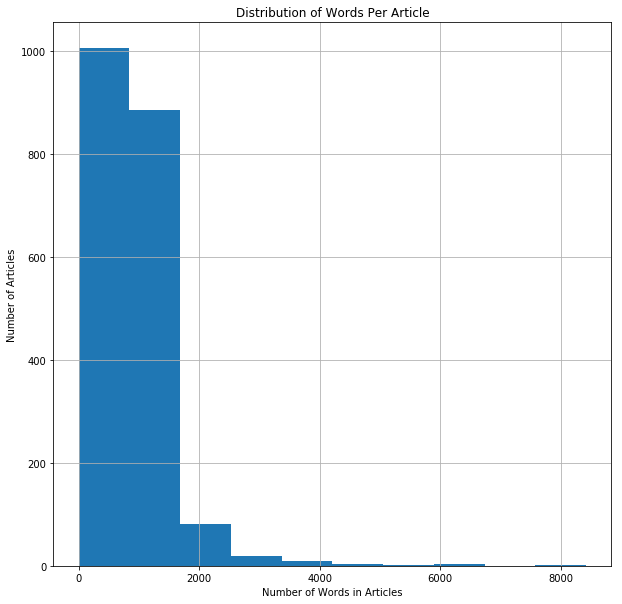

In [3]:
df.word_count.hist(figsize=(10,10))
plt.title('Distribution of Words Per Article')
plt.xlabel('Number of Words in Articles')
plt.ylabel('Number of Articles')

In [4]:
word_counts = {}
for h in df.main_headline:
    for word in h.split():
        word = word.lower()
        word_counts[word] = word_counts.get(word, 0) + 1
word_counts = pd.DataFrame.from_dict(word_counts, orient='index')
word_counts.columns = ['count']
word_counts = word_counts.sort_values(by='count', ascending=False)
word_counts.head(10)

,count
to,500
in,445
the,443
of,301
a,283
trump,227
for,218
on,185
and,161
is,127


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text yticklabel objects>)

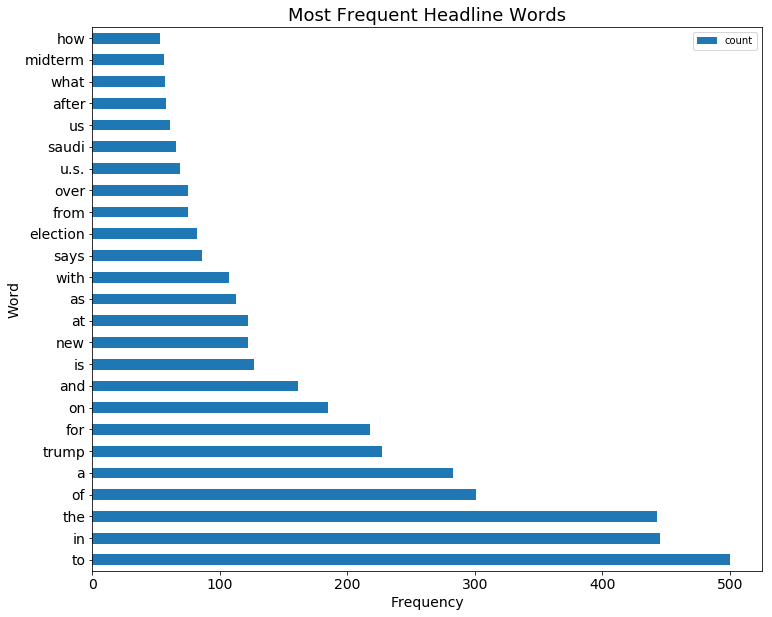

In [5]:
word_counts.head(25).plot(kind='barh', figsize=(12,10))
plt.title('Most Frequent Headline Words',  fontsize=18)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word',  fontsize=14)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)

## Topic Modelling

#### Brief Background

In order to perform topic modelling on our data we will use two primary tools. The first is to turn our text into a vector of word frequency counts; each possible word will be a feature and the number of times that word occurs will be represented by a number. From there, we can then apply mathematical operations to this numerical representation. In our case, we will be applying a common Natural Language Processing Algorithm known as Latent Dirichlet Allocation (LDA). For more technical details, start [here](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

## Count Vectorizer

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
        'This is the first document.',
        'This document is the second document.',
        'And this is the third one.',
        'Is this the first document?',
        ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())  

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
#Installing a new python package on the fly
!pip install lda

## LDA: Latent Dirichlet Allocation

https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

http://jmlr.org/papers/volume3/blei03a/blei03a.pdf

Latent dirichlet allocation is a probabilistic model for classifying documents. It works by viewing documents as mixtures of topics. In turn, topics can be viewed of as probability distributions of words. As we'll see, this allows us to model topics of a corpus and then visualize these topics by the top words associated with the topics as word clouds. While the mathematics behind LDA is fairly complex and outside the scope of this presentation, you can easily implement this powerful concept using prebuilt tools based on this academic research.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import lda
import numpy as np

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000,
                                stop_words='english');
tf = tf_vectorizer.fit_transform(df.main_headline);


model = lda.LDA(n_topics=6, n_iter=1500, random_state=1);
model.fit(tf);

topic_word = model.topic_word_  # model.components_ also works
vocab = tf_vectorizer.get_feature_names();

INFO:lda:n_documents: 2010
INFO:lda:vocab_size: 1943
INFO:lda:n_words: 10657
INFO:lda:n_topics: 6
INFO:lda:n_iter: 1500
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -123726
INFO:lda:<10> log likelihood: -86737
INFO:lda:<20> log likelihood: -85052
INFO:lda:<30> log likelihood: -84339
INFO:lda:<40> log likelihood: -83882
INFO:lda:<50> log likelihood: -83550
INFO:lda:<60> log likelihood: -83251
INFO:lda:<70> log likelihood: -83088
INFO:lda:<80> log likelihood: -83000
INFO:lda:<90> log likelihood: -82910
INFO:lda:<100> log likelihood: -82774
INFO:lda:<110> log likelihood: -82743
INFO:lda:<120> log likelihood: -82632
INFO:lda:<130> log likelihood: -82702
INFO:lda:<140> log likelihood: -82690
INFO:ld

In [7]:
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: trump bombs court bomb suspect ex political pipe charged
Topic 1: says trump china caravan migrant border vote mexico eu
Topic 2: new brazil president pm election pittsburgh right political sri
Topic 3: saudi khashoggi election midterm poll briefing vs district elections
Topic 4: trump democrats house race latest senate republicans governor campaign
Topic 5: trump new york debate tax america media white plan


## Visualization

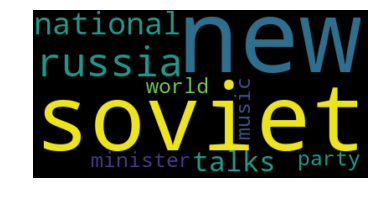

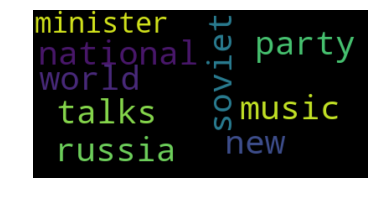

In [9]:
from wordcloud import WordCloud

topic = "new soviet russia national talks party music world minister"
# Generate a word cloud image
wordcloud = WordCloud().generate(topic)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
sns.set_style(None)

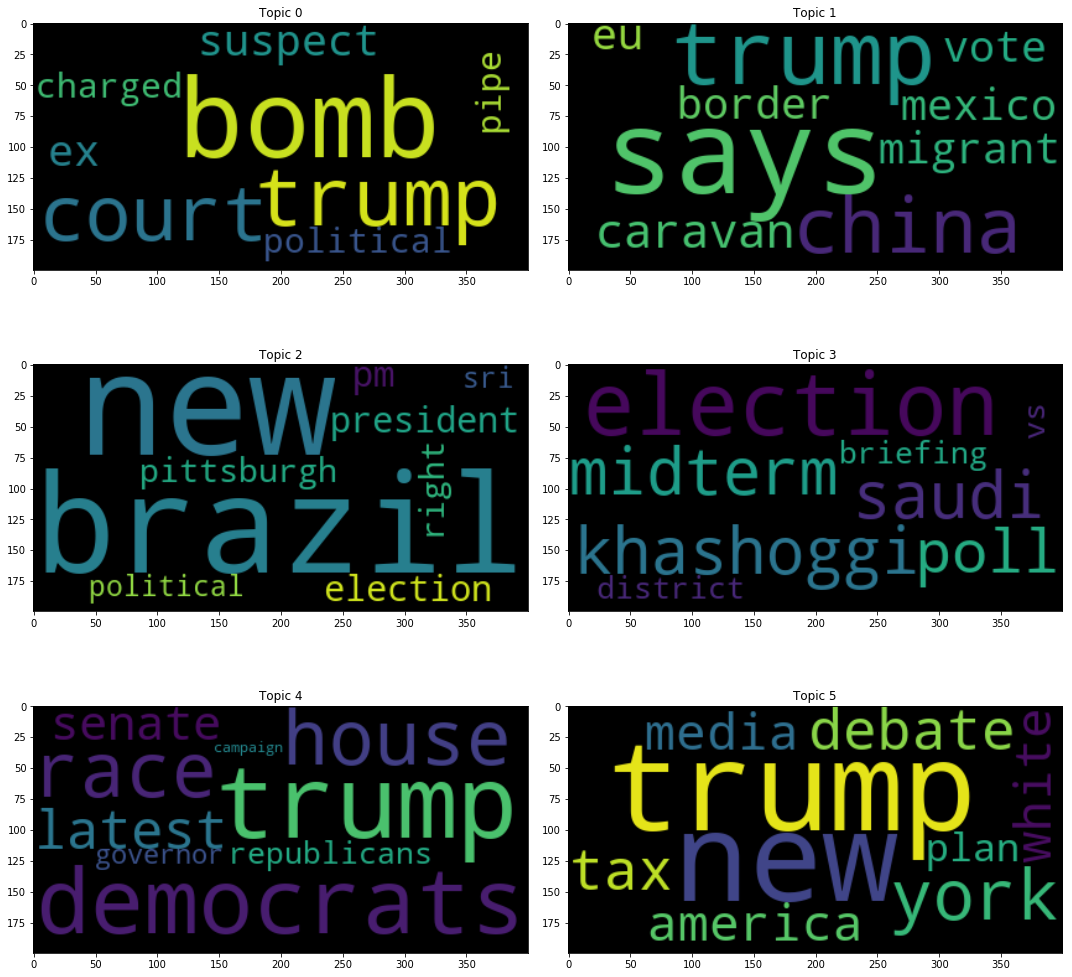

In [10]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
fig.tight_layout()
for i, topic_dist in enumerate(topic_word):
    topic_words = list(np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words):-1])
    topic_words = ' '.join(topic_words)
    row = i//2
    col = i%2
    ax = axes[row, col]
    wordcloud = WordCloud().generate(topic_words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('Topic {}'.format(i))
plt.tight_layout()

## Summary

Congratulations! We've covered a lot here! We started with HTTP requests, one of the fundamental protocols underlying the internet that we know and love. From there, we further investigated OAuth and saw how to get an access token to use in an API such as yelp. Then we made some requests to retrieve information that came back as a json format. We then transformed this data into a dataframe using the Pandas package. Finally, we created an initial visualization of the data that we retrieved using matplotlib!

## Appendix Extensions

## Scraping Full Articles

In [25]:
from bs4 import BeautifulSoup

In [33]:
def scrape_full_article_text(url):
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, 'html.parser')
    paragraphs = soup.find_all('p', attrs={'class': 'story-body-text'})
    full_text=str()
    for paragraph in paragraphs:
        raw_paragraph = paragraph.contents
        cleaned_paragraph=str()
        for piece in raw_paragraph:
            if piece.string:
                cleaned_paragraph += piece.string
                cleaned_paragraph = cleaned_paragraph.replace(r"<.*?>","")
                cleaned_paragraph = cleaned_paragraph.encode('ascii','ignore')
                print(cleaned_paragraph, type(cleaned_paragraph))
        full_text += str(cleaned_paragraph)
    return full_text